<a href="https://colab.research.google.com/github/ManasaR08/Tensorflow/blob/main/callbacks_find_ideal_learning_rate_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Finding the best Learning Rate

We can do so by following the below steps:

1. A learning rate **callback**
2. Another model
3. Modified loss curve plot

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["accuracy"])

#creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(X_train,
                    y_train,
                    epochs = 100,
                    callbacks = [lr_scheduler])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5075
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5050
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5088
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5038
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5100
Epoch 11/

In [5]:
df = pd.DataFrame(history.history)

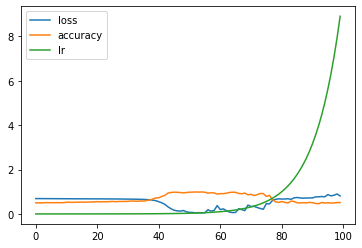

In [6]:
df.plot()

Text(0.5, 1.0, 'Learning Rate vs Loss')

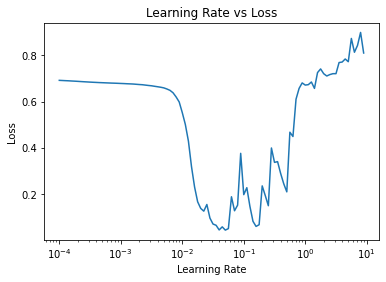

In [7]:
#plotting learning rate vs loss

plt.semilogx(df['lr'], df['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

From the above plot, we can see that the loss decreases the fastest when the learning rate is 0.02

### Training with ideal learning rate

In [8]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.02),
              metrics = ["accuracy"])

history_2 = model_2.fit(X_train,
                    y_train,
                    epochs = 20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/20
25/25 [

### Results after training with previous learning rate

In [9]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["accuracy"])

history_3 = model_3.fit(X_train,
                    y_train,
                    epochs = 25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5638
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5650
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.5763
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.5725
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.5713
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.5938
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.6275
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6963
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7212
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7675
Epoch 11/25
25/25 [

In [10]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100


[0.21504607796669006, 0.9100000262260437]

In [11]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.1886371374130249, 0.9449999928474426]

Even tho model 2 has a better training accuracy, model 3 is performing better on test data. 

In [12]:
import numpy as np
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx , yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  #for multiclass
  if len(y_pred[0])>1:
    print("Multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contour(xx,yy,y_pred,cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


Binary classification
Binary classification


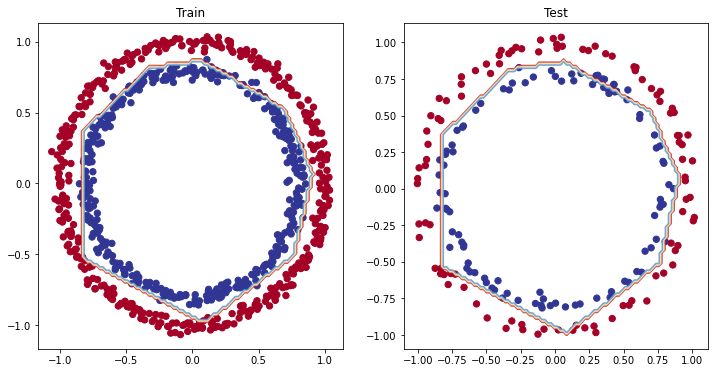

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)
plt.show()

Binary classification
Binary classification


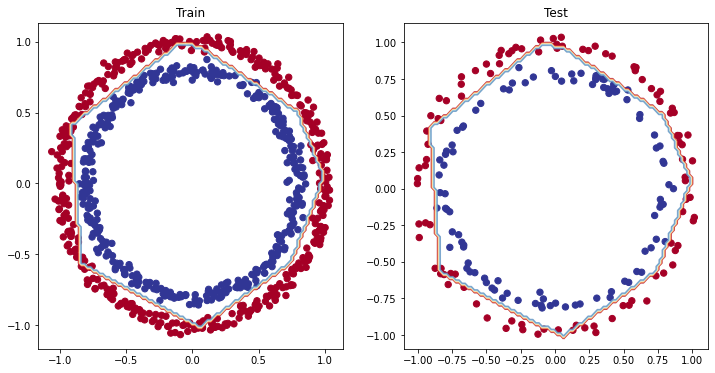

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)
plt.show()